# MNIST Classification test using a 5-dimensional sphere codes

In [1]:
import requests
import math
import numpy
from helpers.basis_helper import normalize, hadamard
from helpers.tf_qsoftmax import qsoftmax

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Construct a sphere code
This sphere code "basis" has 10 vectors in 5 dimensions, minimum mutual angle is about 90$^\circ$, except for antipodal vectors

In [3]:
sp_5 = numpy.array(hadamard(5, 1), dtype=numpy.float32)
basis5 = normalize(sp_5)

## Let's build and train our model
This is the same architecture except we have an output of 5 dimensions and apply the qsoftmax function as the activation function

In [4]:
sp5_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Lambda(qsoftmax(basis5))
])

In [5]:
sp5_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [6]:
sp5_model.fit(x_train,
              y_train,
              epochs=20,
              validation_data=(x_test, y_test),
              verbose=0)

## We display some results
### The validation loss tells us how well the training went

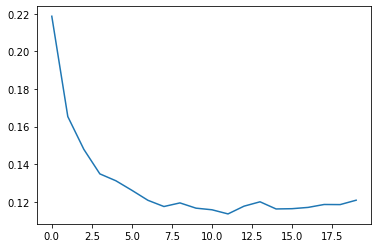

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Markdown

plt.plot(sp5_model.history.history['val_loss'])

### Print the final results in big bold text

In [8]:
text = "The accuracy is {:4.3f}% for the test set and {:4.3f}% for the training set".format(
    sp5_model.history.history['val_accuracy'][-1]*100,
    sp5_model.history.history['accuracy'][-1]*100)
display(Markdown(f"# {text}"))

# The accuracy is 96.610% for the test set and 97.258% for the training set

In [9]:
text

'The accuracy is 96.610% for the test set and 97.258% for the training set'